# Quickstart: Pandas API on Spark

This is a short introduction to pandas API on Spark, geared mainly for new users. This notebook shows you some key differences between pandas and pandas API on Spark. This notebook comes from the documentation on pandas API on Spark' at [the quickstart page](https://spark.apache.org/docs/latest/api/python/getting_started/index.html).

Customarily, we import pandas API on Spark as follows:

In [1]:
import pandas as pd
import numpy as np
import pyspark.pandas as ps
from pyspark.sql import SparkSession

## Object Creation



Creating a pandas-on-Spark Series by passing a list of values, letting pandas API on Spark create a default integer index:

In [2]:
s = ps.Series([1, 3, 5, np.nan, 6, 8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a pandas-on-Spark DataFrame by passing a dict of objects that can be converted to series-like.

In [4]:
psdf = ps.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])

In [5]:
psdf

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


Creating a pandas DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [6]:
dates = pd.date_range('20130101', periods=6)

In [7]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
pdf = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [9]:
pdf

,A,B,C,D
2013-01-01,-0.013926,-0.810390,-2.556715,-0.133457
2013-01-02,2.310112,-1.521715,-0.392434,-0.213379
2013-01-03,-0.642412,0.546495,-0.290087,0.262268
2013-01-04,1.153975,0.238643,0.272249,0.587066
2013-01-05,2.648059,0.086818,-0.370835,-1.760633
2013-01-06,-0.479613,-1.488488,-0.101038,-0.762998


Now, this pandas DataFrame can be converted to a pandas-on-Spark DataFrame

In [10]:
psdf = ps.from_pandas(pdf)

In [11]:
type(psdf)

pyspark.pandas.frame.DataFrame

It looks and behaves the same as a pandas DataFrame.

In [12]:
psdf

,A,B,C,D
2013-01-01,-0.013926,-0.810390,-2.556715,-0.133457
2013-01-02,2.310112,-1.521715,-0.392434,-0.213379
2013-01-03,-0.642412,0.546495,-0.290087,0.262268
2013-01-04,1.153975,0.238643,0.272249,0.587066
2013-01-05,2.648059,0.086818,-0.370835,-1.760633
2013-01-06,-0.479613,-1.488488,-0.101038,-0.762998


Also, it is possible to create a pandas-on-Spark DataFrame from Spark DataFrame easily.

Creating a Spark DataFrame from pandas DataFrame

In [13]:
spark = SparkSession.builder.getOrCreate()

In [14]:
sdf = spark.createDataFrame(pdf)

In [15]:
sdf.show()

+--------------------+-------------------+--------------------+--------------------+
|                   A|                  B|                   C|                   D|
+--------------------+-------------------+--------------------+--------------------+
|-0.01392602207087...|-0.8103901533863479|  -2.556714599029609|-0.13345655489044828|
|   2.310112224681124| -1.521714795329359| -0.3924339358380205| -0.2133791079665288|
| -0.6424122397955485| 0.5464947012921858|-0.29008726121369893|  0.2622680809852574|
|  1.1539750508868847|0.23864324895311745|  0.2722488051584257|  0.5870662420293931|
|  2.6480593758915165|0.08681807320242495|-0.37083522739916397|  -1.760632655217658|
| -0.4796126258996613|-1.4884883100529462|-0.10103780979251673| -0.7629975011767554|
+--------------------+-------------------+--------------------+--------------------+



Creating pandas-on-Spark DataFrame from Spark DataFrame.

In [16]:
psdf = sdf.pandas_api()

In [17]:
psdf

,A,B,C,D
0,-0.013926,-0.810390,-2.556715,-0.133457
1,2.310112,-1.521715,-0.392434,-0.213379
2,-0.642412,0.546495,-0.290087,0.262268
3,1.153975,0.238643,0.272249,0.587066
4,2.648059,0.086818,-0.370835,-1.760633
5,-0.479613,-1.488488,-0.101038,-0.762998


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes) . Types that are common to both Spark and pandas are currently supported.

In [18]:
psdf.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

Here is how to show top rows from the frame below.

Note that the data in a Spark dataframe does not preserve the natural order by default. The natural order can be preserved by setting `compute.ordered_head` option but it causes a performance overhead with sorting internally.

In [19]:
psdf.head()

,A,B,C,D
0,-0.013926,-0.810390,-2.556715,-0.133457
1,2.310112,-1.521715,-0.392434,-0.213379
2,-0.642412,0.546495,-0.290087,0.262268
3,1.153975,0.238643,0.272249,0.587066
4,2.648059,0.086818,-0.370835,-1.760633


Displaying the index, columns, and the underlying numpy data.

In [20]:
psdf.index

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [21]:
psdf.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [22]:
psdf.to_numpy()

/usr/lib/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


array([[-0.01392602, -0.81039015, -2.5567146 , -0.13345655],
       [ 2.31011222, -1.5217148 , -0.39243394, -0.21337911],
       [-0.64241224,  0.5464947 , -0.29008726,  0.26226808],
       [ 1.15397505,  0.23864325,  0.27224881,  0.58706624],
       [ 2.64805938,  0.08681807, -0.37083523, -1.76063266],
       [-0.47961263, -1.48848831, -0.10103781, -0.7629975 ]])

Showing a quick statistic summary of your data

In [23]:
psdf.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.829366,-0.491440,-0.573143,-0.336855
std,1.428028,0.905761,1.002580,0.834019
min,-0.642412,-1.521715,-2.556715,-1.760633
25%,-0.479613,-1.488488,-0.392434,-0.762998
50%,-0.013926,-0.810390,-0.370835,-0.213379
75%,2.310112,0.238643,-0.101038,0.262268
max,2.648059,0.546495,0.272249,0.587066


Transposing your data

In [24]:
psdf.T

,0,1,2,3,4,5
A,-0.013926,2.310112,-0.642412,1.153975,2.648059,-0.479613
B,-0.810390,-1.521715,0.546495,0.238643,0.086818,-1.488488
C,-2.556715,-0.392434,-0.290087,0.272249,-0.370835,-0.101038
D,-0.133457,-0.213379,0.262268,0.587066,-1.760633,-0.762998


Sorting by its index

In [25]:
psdf.sort_index(ascending=False)

,A,B,C,D
5,-0.479613,-1.488488,-0.101038,-0.762998
4,2.648059,0.086818,-0.370835,-1.760633
3,1.153975,0.238643,0.272249,0.587066
2,-0.642412,0.546495,-0.290087,0.262268
1,2.310112,-1.521715,-0.392434,-0.213379
0,-0.013926,-0.810390,-2.556715,-0.133457


Sorting by value

In [26]:
psdf.sort_values(by='B')

,A,B,C,D
1,2.310112,-1.521715,-0.392434,-0.213379
5,-0.479613,-1.488488,-0.101038,-0.762998
0,-0.013926,-0.810390,-2.556715,-0.133457
4,2.648059,0.086818,-0.370835,-1.760633
3,1.153975,0.238643,0.272249,0.587066
2,-0.642412,0.546495,-0.290087,0.262268


## Missing Data
Pandas API on Spark primarily uses the value `np.nan` to represent missing data. It is by default not included in computations. 


In [27]:
pdf1 = pdf.reindex(index=dates[0:4], columns=list(pdf.columns) + ['E'])

In [28]:
pdf1.loc[dates[0]:dates[1], 'E'] = 1

In [29]:
psdf1 = ps.from_pandas(pdf1)

In [30]:
psdf1

,A,B,C,D,E
2013-01-01,-0.013926,-0.810390,-2.556715,-0.133457,1.0
2013-01-02,2.310112,-1.521715,-0.392434,-0.213379,1.0
2013-01-03,-0.642412,0.546495,-0.290087,0.262268,NaN
2013-01-04,1.153975,0.238643,0.272249,0.587066,NaN


To drop any rows that have missing data.

In [31]:
psdf1.dropna(how='any')

,A,B,C,D,E
2013-01-01,-0.013926,-0.810390,-2.556715,-0.133457,1.0
2013-01-02,2.310112,-1.521715,-0.392434,-0.213379,1.0


Filling missing data.

In [32]:
psdf1.fillna(value=5)

,A,B,C,D,E
2013-01-01,-0.013926,-0.810390,-2.556715,-0.133457,1.0
2013-01-02,2.310112,-1.521715,-0.392434,-0.213379,1.0
2013-01-03,-0.642412,0.546495,-0.290087,0.262268,5.0
2013-01-04,1.153975,0.238643,0.272249,0.587066,5.0


## Operations

### Stats
Performing a descriptive statistic:

In [33]:
psdf.mean()

A    0.829366
B   -0.491440
C   -0.573143
D   -0.336855
dtype: float64

### Spark Configurations

Various configurations in PySpark could be applied internally in pandas API on Spark.
For example, you can enable Arrow optimization to hugely speed up internal pandas conversion. See also <a href="https://spark.apache.org/docs/latest/sql-pyspark-pandas-with-arrow.html">PySpark Usage Guide for Pandas with Apache Arrow</a> in PySpark documentation.

In [34]:
prev = spark.conf.get("spark.sql.execution.arrow.pyspark.enabled")  # Keep its default value.
ps.set_option("compute.default_index_type", "distributed")  # Use default index prevent overhead.
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings coming from Arrow optimizations.

In [35]:
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", True)
%timeit ps.range(300000).to_pandas()

325 ms ± 70.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", False)
%timeit ps.range(300000).to_pandas()

799 ms ± 37.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
ps.reset_option("compute.default_index_type")
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", prev)  # Set its default value back.

## Grouping
By “group by” we are referring to a process involving one or more of the following steps:

- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

In [38]:
psdf = ps.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})

In [39]:
psdf

,A,B,C,D
0,foo,one,-0.636329,-0.693353
1,bar,one,0.874767,0.521311
2,foo,two,-1.626571,-0.046413
3,bar,three,-0.998752,-0.493857
4,foo,two,0.381605,-1.635234
5,bar,two,0.560358,-0.411091
6,foo,one,-0.748666,-1.252768
7,foo,three,0.710867,1.020885


Grouping and then applying the [sum()](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.groupby.GroupBy.sum.html) function to the resulting groups.

In [40]:
psdf.groupby('A').sum()

,C,D
A,,
bar,0.436373,-0.383637
foo,-1.919096,-2.606884


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

In [41]:
psdf.groupby(['A', 'B']).sum()

C         D
A   B                        
foo two   -1.244967 -1.681647
bar three -0.998752 -0.493857
foo one   -1.384996 -1.946121
    three  0.710867  1.020885
bar one    0.874767  0.521311
    two    0.560358 -0.411091

## Plotting

In [42]:
pser = pd.Series(np.random.randn(1000),
                 index=pd.date_range('1/1/2000', periods=1000))

In [43]:
psser = ps.Series(pser)

In [44]:
psser = psser.cummax()

23/03/13 23:20:51 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/13 23:20:51 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/13 23:20:51 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/13 23:20:51 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/13 23:20:51 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


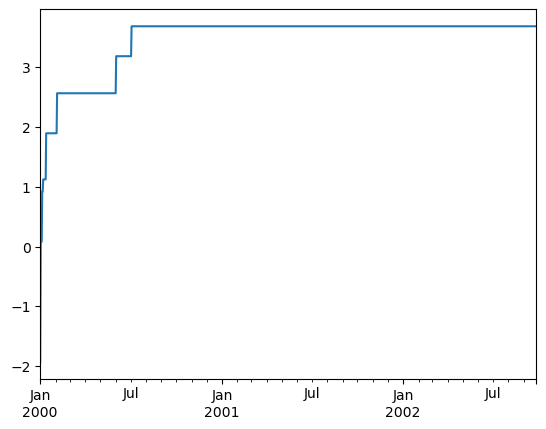

In [45]:
psser.plot(backend='matplotlib');

On a DataFrame, the [plot()](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.plot.html) method is a convenience to plot all of the columns with labels:

In [46]:
pdf = pd.DataFrame(np.random.randn(1000, 4), index=pser.index,
                   columns=['A', 'B', 'C', 'D'])

In [47]:
psdf = ps.from_pandas(pdf)

In [48]:
psdf = psdf.cummax()

23/03/13 23:20:53 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/13 23:20:53 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/13 23:20:53 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/13 23:20:53 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/13 23:20:53 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


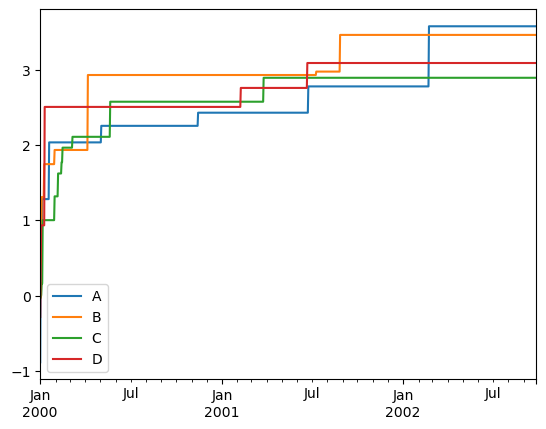

In [49]:
psdf.plot(backend='matplotlib');

For more details, [Plotting](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/frame.html#plotting) documentation.

## Getting data in/out

### CSV

CSV is straightforward and easy to use. See [here](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.to_csv.html) to write a CSV file and [here](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.read_csv.html) to read a CSV file.

In [50]:
psdf.to_csv('foo.csv')
ps.read_csv('foo.csv').head(10)

23/03/13 23:20:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/13 23:20:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/13 23:20:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/13 23:20:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/13 23:20:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


,A,B,C,D
0,-0.886930,0.423197,-0.031357,-0.284684
1,0.703276,0.423197,-0.031357,0.471747
2,0.703276,0.423197,0.009122,0.934176
3,0.703276,1.310247,0.160521,0.934176
4,1.283023,1.310247,0.160521,0.934176
5,1.283023,1.310247,1.003025,0.934176
6,1.283023,1.310247,1.003025,0.934176
7,1.283023,1.310247,1.003025,0.934176
8,1.283023,1.747975,1.003025,0.934176
9,1.283023,1.747975,1.003025,2.509021


### Parquet

Parquet is an efficient and compact file format to read and write faster. See [here](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.to_parquet.html) to write a Parquet file and [here](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.read_parquet.html) to read a Parquet file.

In [51]:
psdf.to_parquet('bar.parquet')
ps.read_parquet('bar.parquet').head(10)

23/03/13 23:21:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/13 23:21:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/13 23:21:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/13 23:21:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/13 23:21:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


,A,B,C,D
0,-0.886930,0.423197,-0.031357,-0.284684
1,0.703276,0.423197,-0.031357,0.471747
2,0.703276,0.423197,0.009122,0.934176
3,0.703276,1.310247,0.160521,0.934176
4,1.283023,1.310247,0.160521,0.934176
5,1.283023,1.310247,1.003025,0.934176
6,1.283023,1.310247,1.003025,0.934176
7,1.283023,1.310247,1.003025,0.934176
8,1.283023,1.747975,1.003025,0.934176
9,1.283023,1.747975,1.003025,2.509021


### Spark IO

In addition, pandas API on Spark fully supports Spark's various datasources such as ORC and an external datasource.  See [here](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.to_orc.html) to write it to the specified datasource and [here](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.read_orc.html) to read it from the datasource.

In [52]:
psdf.to_spark_io('zoo.orc', format="orc")
ps.read_spark_io('zoo.orc', format="orc").head(10)

23/03/13 23:21:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/13 23:21:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/13 23:21:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/13 23:21:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/13 23:21:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


,A,B,C,D
0,-0.886930,0.423197,-0.031357,-0.284684
1,0.703276,0.423197,-0.031357,0.471747
2,0.703276,0.423197,0.009122,0.934176
3,0.703276,1.310247,0.160521,0.934176
4,1.283023,1.310247,0.160521,0.934176
5,1.283023,1.310247,1.003025,0.934176
6,1.283023,1.310247,1.003025,0.934176
7,1.283023,1.310247,1.003025,0.934176
8,1.283023,1.747975,1.003025,0.934176
9,1.283023,1.747975,1.003025,2.509021


See the [Input/Output](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/io.html) documentation for more details.